In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import timedelta
import statistics as st
import math 
from scipy.optimize import curve_fit

Asignación 2

Valentina Alfaro Rivera 2211702

Nathalia Perez Rojas 2200023

Acomodo de datos:
1. Selección del periodo Abril - Agosto de 2019
2. Arreglo de la información de las horan en minutos por comodidad
3. Eliminar los datos faltantes con ayuda de .dropna()
4. Creación de las ventanas móviles

In [2]:
#lectura de datos excel:
datos = pd.read_excel('Datos.xlsx','DatosTrabajo',usecols=("A:G"))
datos = datos.dropna()

In [3]:
#array medidas experimentales
tiempo_teo = np.array(datos['ID_HORA'])
tiempo_exp = np.array(datos['ID_HORA_MEDIDA'])
valor_teo = np.array(datos['PM'])
valor_exp = np.array(datos['VALOR'])


In [4]:
#ventana Móvil de 5 horas
id5 = []
valor_exp5 = []
valor_teo5 = []

x = 0
while(x < len(valor_teo)-4):
  list1 = []
  list2 = []
  for y in range(0,5,1):
    list1.append(valor_exp[x+y])
    list2.append(valor_teo[x+y])
  valor_exp5.append(np.mean(list1))
  valor_teo5.append(np.mean(list2))
  id5.append(x)
  x+=2

print(len(valor_exp5))

1663


In [5]:
# Ventana Móvil de 11 horas
id11 = []
valor_exp11 = []
valor_teo11 = []

x = 0
while(x < len(valor_teo)-10):
  list1 = []
  list2 = []
  for y in range(0,11,1):
    list1.append(valor_exp[x+y])
    list2.append(valor_teo[x+y])
  valor_exp11.append(np.mean(list1))
  valor_teo11.append(np.mean(list2))
  id11.append(x)
  x+=5

print(len(valor_exp11))

664


In [6]:
# Ventana Móvil de 19 horas
id19 = []
valor_exp19 = []
valor_teo19 = []

x = 0
while(x < len(valor_teo)-18):
  list1 = []
  list2 = []
  for y in range(0,18,1):
    list1.append(valor_exp[x+y])
    list2.append(valor_teo[x+y])
  valor_exp19.append(np.mean(list1))
  valor_teo19.append(np.mean(list2))
  id19.append(x)
  x+=8

print(len(valor_exp19))

414


METODO 1:


In [7]:
#De listas a vectores :3
agteo = np.array(valor_teo5)
agexp = np.array(valor_exp5)
tiemp = np.array(id5)

0.0011211766952972735 14.179318698251537


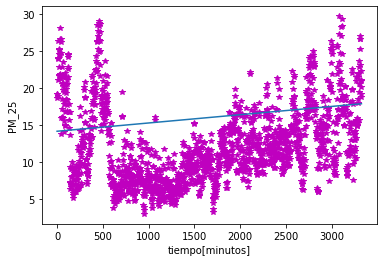

In [8]:
#Interpolación teorico
#pendiente de la recta:


na= 1663
a1 = math.fsum(agteo*tiemp)
a2 = st.mean(tiemp)
a3 = st.mean(agteo)
a4 = sum(tiemp**2)
a5= a2**2

ab0 = (a1-(na*a2*a3))/(a4-na*a5)

#constante del modelo
prmabt = st.mean(tiemp)
prmab1 = st.mean(agteo)
cte_Abr  = prmab1 + ab0*prmabt


#ecuacion de la recta:

def yab(x):
  yab0 = cte_Abr+ab0*tiemp
  return yab0

y_ab = yab(tiemp)


#grafica

plt.plot(tiemp,agteo,'m*')
plt.plot(tiemp,y_ab)


plt.xlabel('tiempo[minutos]')
plt.ylabel('PM_25')
print(ab0,cte_Abr)

0.0019857967627013914 17.958568182732648


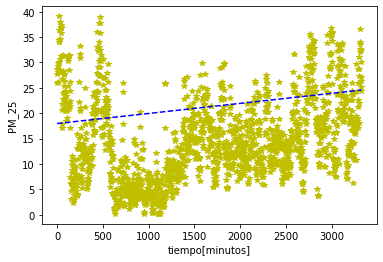

In [9]:
#Interpolación experimental
#pendiente de la recta:


nae= 1663
ae1 = sum(agexp*tiemp )
ae2 = st.mean(tiemp)
ae3 = st.mean(agexp)
ae4 = sum(tiemp **2)
ae5= ae2**2

abe0 = (ae1-nae*ae2*ae3)/(ae4-nae*ae5)


#constante del modelo
prmabet = st.mean(tiemp)
prmabe1 = st.mean(agexp)
cte_Abre = prmabe1 + abe0*prmabet


#ecuacion de la recta:

def yabe(x):
  yabe0 = cte_Abre+abe0*tiemp
  return yabe0

y_abe = yabe(tiemp)


#grafica

plt.plot(tiemp,agexp,'y*')
plt.plot(tiemp,y_abe,'b--')

plt.xlabel('tiempo[minutos]')
plt.ylabel('PM_25')
print(abe0,cte_Abre)

In [10]:
error_pendiente = ab0/abe0
error_cte = cte_Abre-cte_Abr

In [11]:
print(error_pendiente)

0.5645979066720169


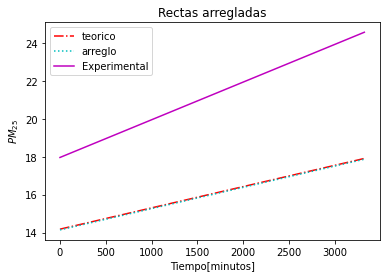

In [12]:
# Calibración
plt.figure(1)
plt.title('Rectas arregladas')
plt.plot(tiemp,(y_ab),'r-.',label="teorico")
plt.plot(tiemp,(y_abe*0.5645979066720169)+4,'c:', label='arreglo')
plt.plot(tiemp,y_abe,'m-',label='Experimental')
plt.xlabel('Tiempo[minutos]')
plt.ylabel('$PM_{25}$')
plt.legend()

In [13]:
valor_calibrado = []
for i in range (0,len(valor_exp5),1):
  valor_calibrado.append((valor_exp5[i]*error_pendiente)+error_cte)

No handles with labels found to put in legend.


[0.93370335]


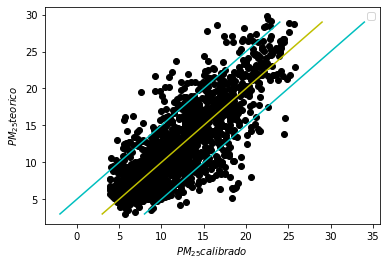

In [14]:
# Calibración
#Curve_fit
def f(x, m):           
    return(m*x)

#para un rango de 3 horas
valor,cov1=curve_fit(f, valor_teo5, valor_calibrado)

print(valor)

xl = list(range(3,30,1))
yl = list(range(3,30,1))
ymas = [_-5 for _ in xl]
ymenos = [_+5 for _ in xl]

plt.figure(1)
plt.plot(valor_calibrado,agteo,'ko')
plt.plot(yl,xl,'y')
plt.plot(ymas,xl,'c')
plt.plot(ymenos,xl,'c')
plt.xlabel('$PM_{25} calibrado$')
plt.ylabel('$PM_{25} teorico$')
plt.legend()

In [15]:
#La mejor tolerancia
T5A = {}
DT5A = {}
for x in range(3,11,1):
  desvios = []

  #contador de puntos
  contador = []
  for i in range(0,len(agteo),1):
    errorabs = abs((valor_calibrado[i]) - agteo[i])
    if errorabs >= x:
      contador.append(errorabs)
  desvios.append(len(contador))
  DT5A[x] = desvios         


#Impresión de datos
#Para los desvíos por tolerancia
for x in range(3,11,1):
  print('Tolerancia de: ',x, 'Desvios:', DT5A[x])

Tolerancia de:  3 Desvios: [503]
Tolerancia de:  4 Desvios: [330]
Tolerancia de:  5 Desvios: [223]
Tolerancia de:  6 Desvios: [136]
Tolerancia de:  7 Desvios: [72]
Tolerancia de:  8 Desvios: [50]
Tolerancia de:  9 Desvios: [28]
Tolerancia de:  10 Desvios: [20]


# Método dos  
1. Graficar y sacar las distancias euclidianas por ventana
2. Aplicar el código para encontrar los alpha y la tolerancia
3. Graficar y vs y'
4. Hacerle curve fit al anterior para comprobar que quedó bueno

In [16]:
#Distancias euclidianas
error5 = []
error11 = []
error19 = []

for i in range(0,len(valor_teo5),1):
  error5.append(abs(valor_exp5[i]-valor_teo5[i]))

No handles with labels found to put in legend.


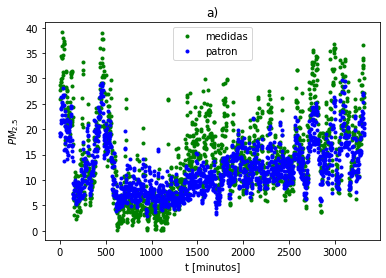

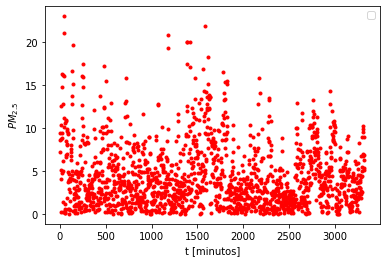

In [17]:
#Figuras
#Ventana de 5
plt.figure(1)
plt.title('a)')
plt.plot(id5,valor_exp5,"g.",label="medidas")
plt.plot(id5,valor_teo5,"b.",label="patron")
plt.ylabel('$PM_{2.5}$')
plt.xlabel('t [minutos]')
plt.legend()

#Comparación error vs. x
plt.figure(2)
plt.plot(id5,error5,"r.")
plt.ylabel("$PM_{2.5}$")
plt.xlabel("t [minutos]")
plt.legend()

In [18]:
#Código para la mejor tolerancia en alpha
#Código de error

Tolerancia5A = {}
DesviosTolerancia5A = {}

#barrido de horizontales
for x in range(5,11,1):
  desvios = []
  alphas = []
  alp = 0

  #barrido de alphas
  for a in range(0,100,1):
    alphas.append(alp)
    alp += 0.01

    #contador de puntos
    contador = []
    for i in range(0,len(valor_exp5),1):
      errorabs = abs((valor_exp5[i]*alp) - valor_teo[i])
      if errorabs >= x:
        contador.append(errorabs)

    desvios.append(len(contador))
    Tolerancia5A[x] = alphas
    DesviosTolerancia5A[x] = desvios         

#Impresión de datos
#Para beta
for x in range(5,11,1):
  tmp = min(DesviosTolerancia5A[x])
  #print('Tolerancia de: ',x, 'Valores de:', Tolerancia5A[x])
  #print('Tolerancia de: ',x, 'Desvios de:', DesviosTolerancia5A[x])
  print('Tolerancia: ',x, '; Mínimo de desvios: ',tmp, '; Parámetro: ', Tolerancia5A[x][DesviosTolerancia5A[x].index(tmp)])

Tolerancia:  5 ; Mínimo de desvios:  645 ; Parámetro:  0.3900000000000002
Tolerancia:  6 ; Mínimo de desvios:  561 ; Parámetro:  0.46000000000000024
Tolerancia:  7 ; Mínimo de desvios:  481 ; Parámetro:  0.45000000000000023
Tolerancia:  8 ; Mínimo de desvios:  424 ; Parámetro:  0.47000000000000025
Tolerancia:  9 ; Mínimo de desvios:  373 ; Parámetro:  0.47000000000000025
Tolerancia:  10 ; Mínimo de desvios:  335 ; Parámetro:  0.49000000000000027


No handles with labels found to put in legend.


[15.5199998472, 16.649999770799997, 17.190000458399997, 17.6200000764, 17.8900000764, 16.8199996944, 15.6499999236, 17.5299998472, 20.620000534800003, 21.8300001528, 20.420000382, 18.080000152800004, 20.4000002292, 23.4600002304, 22.7699995428, 20.7999998472, 18.38000061, 16.8600009156, 17.050000763999996, 18.800000611199998, 21.5199998472, 22.079999313600002, 22.3999994652, 22.1599994652, 22.049998855200002, 16.0399995804, 10.2700000776, 10.740000230399998, 12.340000764000001, 13.0400008404, 14.350000305599998, 16.9500002292, 18.7600005348, 18.920000382, 16.9200002292, 13.6920799236, 12.6520802292, 15.2499998472, 15.78, 16.469999541599996, 16.6099999236, 14.3200000764, 13.279999923599997, 13.639999694399998, 14.589999618, 14.539999923599998, 12.259999923599997, 11.1, 12.2299999236, 13.9800002292, 14.0400002292, 13.489999923600003, 12.969999617999997, 13.1300000376, 12.600000572399997, 11.4600003432, 12.4200002292, 15.2499998472, 18.109999923599997, 18.760000305600002, 18.5400004584, 1

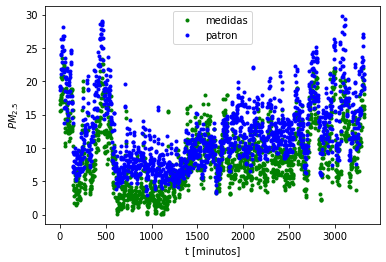

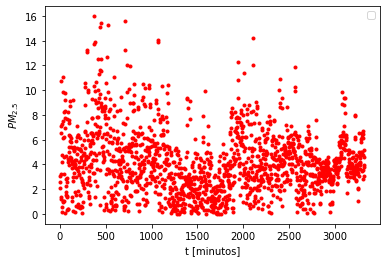

In [19]:
#Gráfica
#Mejor alpha
error_exp5_calibrado = []

for i in range(0,len(valor_teo5),1):
  error_exp5_calibrado.append(abs((valor_exp5[i]*0.6)-valor_teo5[i]))

valor_exp5_calibrado = []
for i in range (0,len(valor_exp5),1):
  valor_exp5_calibrado.append(valor_exp5[i]*0.6)

#Valores ajustados
plt.figure(4)
plt.plot(id5,valor_exp5_calibrado,"g.",label="medidas")
plt.plot(id5,valor_teo5,"b.",label="patron")
plt.ylabel('$PM_{2.5}$')
plt.xlabel('t [minutos]')
plt.legend()

#Error ajustado
plt.figure(5)
plt.plot(id5,error_exp5_calibrado,"r.")
plt.ylabel('$PM_{2.5}$')
plt.xlabel('t [minutos]')
plt.legend()

print(valor_exp5_calibrado)
print(valor_teo5)

In [20]:
#Código para la mejor tolerancia en alpha
#Código de error

Tolerancia_B = {}
DesviosToleranciaB = {}

#barrido de horizontales
for x in range(3,11,1):
  desvios = []
  betas = []

  #barrido de betas
  for bt in range(0,10,1):
    betas.append(bt)

    #contador de puntos
    contador = []
    for i in range(0,len(valor_exp5),1):
      errorabs = abs((valor_exp5[i]*0.6+bt) - valor_teo5[i])
      if errorabs >= x:
        contador.append(errorabs)

    desvios.append(len(contador))
  Tolerancia_B[x] = betas
  DesviosToleranciaB[x] = desvios

#Impresión de datos
#Para beta
for x in range(3,11,1):
  print('Tolerancia de: ',x, 'Parámetro:', Tolerancia_B[x])
  print('Tolerancia de: ',x, 'Desvios de:', DesviosToleranciaB[x])

Tolerancia de:  3 Parámetro: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Tolerancia de:  3 Desvios de: [1086, 837, 645, 531, 517, 574, 716, 967, 1195, 1364]
Tolerancia de:  4 Parámetro: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Tolerancia de:  4 Desvios de: [778, 561, 415, 344, 345, 396, 486, 669, 942, 1181]
Tolerancia de:  5 Parámetro: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Tolerancia de:  5 Desvios de: [518, 356, 260, 229, 223, 257, 349, 461, 655, 930]
Tolerancia de:  6 Parámetro: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Tolerancia de:  6 Desvios de: [332, 217, 170, 139, 141, 176, 232, 335, 449, 647]
Tolerancia de:  7 Parámetro: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Tolerancia de:  7 Desvios de: [206, 146, 96, 82, 92, 116, 162, 220, 327, 442]
Tolerancia de:  8 Parámetro: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Tolerancia de:  8 Desvios de: [140, 85, 58, 49, 57, 78, 104, 154, 213, 322]
Tolerancia de:  9 Parámetro: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Tolerancia de:  9 Desvios de: [80, 52, 38, 33, 35, 45, 70, 97, 149, 213]
Tolerancia de:  10 Paráme

[19.519999847199998, 20.649999770799997, 21.190000458399997, 21.6200000764, 21.8900000764, 20.8199996944, 19.6499999236, 21.5299998472, 24.620000534800003, 25.8300001528, 24.420000382, 22.080000152800004, 24.4000002292, 27.4600002304, 26.7699995428, 24.7999998472, 22.38000061, 20.8600009156, 21.050000763999996, 22.800000611199998, 25.5199998472, 26.079999313600002, 26.3999994652, 26.1599994652, 26.049998855200002, 20.0399995804, 14.2700000776, 14.740000230399998, 16.340000764000003, 17.040000840399998, 18.3500003056, 20.9500002292, 22.7600005348, 22.920000382, 20.9200002292, 17.692079923599998, 16.6520802292, 19.2499998472, 19.78, 20.469999541599996, 20.6099999236, 18.3200000764, 17.279999923599995, 17.639999694399997, 18.589999618, 18.5399999236, 16.2599999236, 15.1, 16.229999923599998, 17.9800002292, 18.0400002292, 17.489999923600003, 16.969999617999996, 17.1300000376, 16.6000005724, 15.4600003432, 16.4200002292, 19.2499998472, 22.109999923599997, 22.760000305600002, 22.5400004584, 2

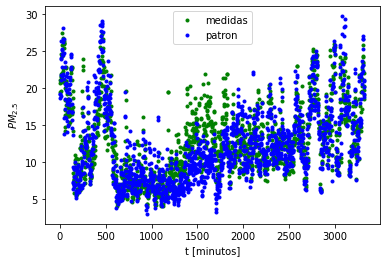

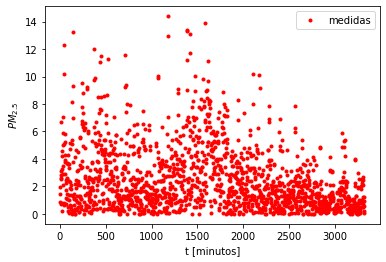

In [21]:
#Gráfica
#Mejor beta
ErrorExp5Calibrado = []

for i in range(0,len(valor_teo5),1):
  ErrorExp5Calibrado.append(abs((valor_exp5[i]*0.6+4)-valor_teo5[i]))

Exp5Calibrado = []
for i in range (0,len(valor_teo5),1):
  Exp5Calibrado.append(valor_exp5[i]*0.6+4)

#Valores ajustados
plt.figure(6)
plt.plot(id5,Exp5Calibrado,"g.",label="medidas")
plt.plot(id5,valor_teo5,"b.",label="patron")
plt.ylabel('$PM_{2.5}$')
plt.xlabel('t [minutos]')
plt.legend()

#Error ajustado
plt.figure(7)
plt.plot(id5,ErrorExp5Calibrado,"r.",label="medidas")
plt.ylabel('$PM_{2.5}$')
plt.xlabel('t [minutos]')
plt.legend()

print(Exp5Calibrado)
print(valor_teo5)

No handles with labels found to put in legend.


[0.991137]


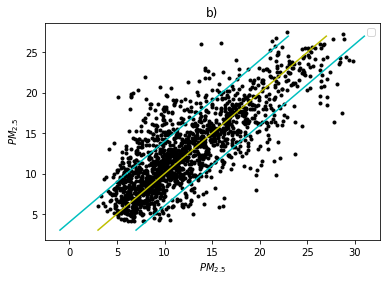

In [22]:
#Comparación
xd = list(range(3,28,1))
yd = list(range(3,28,1))
ymas = [_+4 for _ in xd]
ymenos = [_-4 for _ in xd]

#Gráfica
plt.figure(7)
plt.plot(valor_teo5,Exp5Calibrado,"k.")
plt.plot(yd,xd,'y')
plt.plot(ymas,xd,'c')
plt.plot(ymenos,xd,'c')
plt.ylabel('$PM_{2.5}$')
plt.xlabel('$PM_{2.5}$')
plt.title('b)')
plt.legend()

#Curve_fit
def f(x, m):           
    return(m*x)

#para un rango de 3 horas
alpha5,cov1=curve_fit(f, valor_teo5, Exp5Calibrado)

print(alpha5)